In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings

np.random.seed(0)
warnings.filterwarnings("ignore")
THRESHOLD = 4

## Task: To predict whether the user likes the mobile phone or not.
## Assumption: If the average rating of mobile >= threshold, then the user likes it, otherwise not.

In [2]:
# read data from file
train = pd.read_csv("../input/padhai-mp-neuron-like-unlike-classification/train.csv") 
test = pd.read_csv("../input/padhai-mp-neuron-like-unlike-classification/test.csv")

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 355
Number of features in train: 99
Number of data points in test: 119
Number of features in test: 98


## Missing values:

In [3]:
train.describe()

,PhoneId,Rating Count,Review Count,Rating
count,355.000000,3.550000e+02,355.000000,355.000000
mean,235.267606,3.344979e+04,6648.228169,4.071549
std,137.204594,1.151661e+05,18943.317868,0.372663
min,0.000000,1.000000e+00,1.000000,2.500000
25%,113.500000,6.585000e+02,228.000000,3.900000
50%,234.000000,3.744000e+03,951.000000,4.100000
75%,358.000000,1.613650e+04,4208.500000,4.300000
max,472.000000,1.268083e+06,218020.000000,5.000000


In [4]:
train.head()

,PhoneId,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,...,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging,Rating
0,0,NaN,NaN,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,182 grams Below Average ▾Weight compared to11 ...,"Wi-Fi 802.11, a/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.4 mm,NaN,4.5
1,1,NaN,Oppo Browser,64 bit,19:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 30 fps,NaN,yes,NaN,168 grams Average ▾Weight compared to8 - 12 K ...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,75.6 mm,NaN,4.5
2,2,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,yes,yes,v4.2,...,NaN,NaN,yes,NaN,168 grams Average ▾Weight compared to10 - 14 K...,"Wi-Fi 802.11, b/g/n",Mobile Hotspot,74 mm,NaN,4.4
3,4,NaN,NaN,64 bit,18.5:9,Dolby Atmos,3.5 mm,No,yes,v5.0,...,1920x1080 @ 30 fps,NaN,yes,NaN,169 grams Average ▾Weight compared to15 - 23 K...,"Wi-Fi 802.11, a/ac/b/g/n","Wi-Fi Direct, Mobile Hotspot",76.8 mm,NaN,4.3
4,5,NaN,NaN,64 bit,19.5:9,NaN,3.5 mm,Phase Detection autofocus,yes,v4.2,...,1920x1080 @ 60 fps,NaN,yes,NaN,175 grams Below Average ▾Weight compared to12 ...,"Wi-Fi 802.11, a/ac/b/g/n",Mobile Hotspot,76.6 mm,NaN,4.4


In [5]:
train.dtypes.value_counts()

object     95
int64       3
float64     1
dtype: int64

Separate categorical and numerical columns in the data frame

In [6]:
train.dtypes == "object"

PhoneId              False
Also Known As         True
Applications          True
Architecture          True
Aspect Ratio          True
                     ...  
Wi-Fi                 True
Wi-Fi Features        True
Width                 True
Wireless Charging     True
Rating               False
Length: 99, dtype: bool

In [7]:
num_vars = train.columns[train.dtypes!='object']
cat_vars = train.columns[train.dtypes=='object']

print(num_vars)
print(cat_vars)

Index(['PhoneId', 'Rating Count', 'Review Count', 'Rating'], dtype='object')
Index(['Also Known As', 'Applications', 'Architecture', 'Aspect Ratio',
       'Audio Features', 'Audio Jack', 'Autofocus', 'Bezel-less display',
       'Bluetooth', 'Brand', 'Browser', 'Build Material', 'Camera Features',
       'Capacity', 'Chipset', 'Co-Processor', 'Colours', 'Custom UI',
       'Display Colour', 'Display Type', 'Email', 'Expandable Memory',
       'FM Radio', 'Fingerprint Sensor', 'Fingerprint Sensor Position',
       'Flash', 'GPS', 'Games', 'Graphics', 'HDMI', 'Heart Rate Monitor',
       'Height', 'IRIS Scanner', 'Image Resolution', 'Internal Memory', 'Java',
       'Launch Date', 'Loudspeaker', 'Mobile High-Definition Link(MHL)',
       'Model', 'Music', 'NFC', 'Network', 'Network Support',
       'Operating System', 'Optical Image Stabilisation', 'Other Facilities',
       'Other Sensors', 'Phone Book', 'Physical Aperture', 'Pixel Density',
       'Processor', 'Quick Charging', 'RAM',

In [8]:
train[cat_vars].isnull().sum().sort_values(ascending=False)

Stylus                              354
Software Based Aperture             354
Mobile High-Definition Link(MHL)    354
SIM 3                               353
Java                                353
                                   ... 
Pixel Density                         1
Screen Size                           1
Screen Resolution                     1
SIM Slot(s)                           1
Display Type                          1
Length: 95, dtype: int64

In [9]:
train[cat_vars].isnull().sum().sort_values(ascending=False)

Stylus                              354
Software Based Aperture             354
Mobile High-Definition Link(MHL)    354
SIM 3                               353
Java                                353
                                   ... 
Pixel Density                         1
Screen Size                           1
Screen Resolution                     1
SIM Slot(s)                           1
Display Type                          1
Length: 95, dtype: int64

In [10]:
train[cat_vars].isnull()

,Also Known As,Applications,Architecture,Aspect Ratio,Audio Features,Audio Jack,Autofocus,Bezel-less display,Bluetooth,Brand,...,Video Player,Video Recording,Video Recording Features,VoLTE,Waterproof,Weight,Wi-Fi,Wi-Fi Features,Width,Wireless Charging
0,True,True,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
1,True,False,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
2,True,True,False,False,True,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,True
3,True,True,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
4,True,True,False,False,True,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,True,True,False,True,True,False,False,True,False,False,...,True,False,True,True,True,False,False,True,False,True
351,True,True,False,True,True,False,False,True,False,False,...,True,False,True,True,True,False,False,False,False,True
352,True,True,False,True,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
353,True,False,True,True,True,False,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True


MISSING VALUES ARE
- 'Also Known As'(459),
- 'Applications' (421),
- 'Audio Features' (437),
- 'Bezel-less display' (266),
- 'Browser' (449),
- 'Build Material' (338),
- 'Co-Processor' (451),
- 'Display Colour' (457),
- 'Mobile High-Definition Link(MHL)' (472),
- 'Music' (447) 
- 'Email','Fingerprint Sensor Position' (174),
- 'Games' (446),
- 'HDMI' (454),
- 'Heart Rate Monitor' (467),
- 'IRIS Scanner' (467), 
- 'Optical Image Stabilisation' (219),
- 'Other Facilities' (444),
- 'Phone Book' (444),
- 'Physical Aperture'(87),
- 'Quick Charging' (122),
- 'Ring Tone' (444),
- 'Ruggedness' (430),
- SAR Value (315),
- 'SIM 3' (472),
- 'SMS' (470)',
- 'Screen Protection' (229),
- 'Screen to Body Ratio (claimed by the brand)' (428),
- 'Sensor' (242),
- 'Software Based Aperture' (473), 
- 'Special Features' (459),
- 'Standby time' (334),
- 'Stylus' - (473),
- 'TalkTime' (259), 
- 'USB Type-C' (374),
- 'Video Player' (456), 
- 'Video Recording Features' (458),
- 'Waterproof' (398),
- 'Wireless Charging','USB OTG Support' (159), 
- 'Video ,'Recording' (113),
- 'Java' (471),
- 'Browser'(448)

## Very low variance:
'Architecture'(most entries are 64-bit),'Audio Jack','GPS','Loudspeaker','Network','Network Support','Other Sensors'(28),'SIM Size', 'VoLTE'

## Multivalued:
'Colours','Custom UI','Model'(1),'Other Sensors','Launch Date'

## Not important:
'Bluetooth', 'Settings'(75),'Wi-Fi','Wi-Fi Features'

## Doubtful:
'Aspect Ratio','Autofocus','Brand','Camera Features','Fingerprint Sensor'(very few entries are missing), 'Fingerprint Sensor Position', 'Graphics'(multivalued),'Image resolution'(multivalued),'SIM Size','Sim Slot(s)', 'User Available Storage', 'SIM 1', 'SIM 2','Shooting Modes', 'Touch Screen'(24), 'USB Connectivity'

## To check:
'Display Type','Expandable Memory','FM Radio'

## High Correlation with other features
'SIM Slot(s)' high correlation with SIM1 'Weight' has high high correlation with capacity , screen-to-body ratio 'Height' - screen size is also there

## Given a mobile, we can't directly get these features
'Rating Count', 'Review Count'

## Keeping [Factors considering]:
'Capacity','Flash'(17),'Height'(22),'Internal Memory'(20, require cleaning),'Operating System'(25, require cleaning), 'Pixel Density'(1, clean it),'Processor'(22, clean it), 'RAM'(17, clean), 'Rating','Resolution'(cleaning), 'Screen Resolution','Screen Size', 'Thickness'(22), 'Type','User Replaceable','Weight'(cleaning),'Sim Size'(), 'Other Sensors'(28), 'Screen to Body Ratio (calculated)','Width',

## Cleaning Dataset

In [11]:
def data_clean(data):
    
    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    #Features having very low variance 
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    
    return data

## removing Features

In [12]:
train = data_clean(train)
test = data_clean(test)

removing all those data points in which more than 15 features are missing

In [13]:
train = train[(train.isnull().sum(axis=1) <= 15)]
# You shouldn't remove data points from test set
#test = test[(test.isnull().sum(axis=1) <= 15)]

In [14]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 47
Number of data points in test: 119
Number of features in test: 46


## Filling Missing values

In [15]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

In [16]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isna() == True] = "Other"
    
    return data

In [17]:
train = data_clean_2(train)
test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


Not very important feature

In [18]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [19]:
train = data_clean_3(train)
test = data_clean_3(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 341
Number of features in train: 18
Number of data points in test: 119
Number of features in test: 17


In [20]:
# one hot encoding

train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]

(460, 17)
Index(['PhoneId', 'Screen Size', 'SIM Slot(s)', 'Sim1', 'Brand', 'Capacity',
       'Internal Memory', 'Processor_frequency', 'os_name', 'Height',
       'Pixel Density', 'Screen to Body Ratio (calculated)', 'Weight',
       'Resolution', 'Num_cores', 'SIM 2', 'RAM'],
      dtype='object')
(460, 87)
Index(['PhoneId', 'Screen Size', 'Capacity', 'Internal Memory',
       'Processor_frequency', 'Height', 'Pixel Density',
       'Screen to Body Ratio (calculated)', 'Weight', 'Resolution', 'RAM',
       'SIM Slot(s)_Dual SIM, GSM+CDMA', 'SIM Slot(s)_Dual SIM, GSM+GSM',
       'SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE',
       'SIM Slot(s)_Single SIM, GSM', 'Sim1_2G', 'Sim1_3G', 'Sim1_4G',
       'Brand_10.or', 'Brand_Apple', 'Brand_Asus', 'Brand_Billion',
       'Brand_Blackberry', 'Brand_Comio', 'Brand_Coolpad', 'Brand_Do',
       'Brand_Gionee', 'Brand_Google', 'Brand_HTC', 'Brand_Honor',
       'Brand_Huawei', 'Brand_InFocus', 'Brand_Infinix', 'Brand_Intex',
       'Brand_Itel

In [21]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [22]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 88
Number of data points in test: 119
Number of features in test: 87


In [23]:
# Let's check updated shape of training data and testing data
train_new.shape
test_new.shape

(119, 87)

In [24]:
train_new.head()

,PhoneId,Screen Size,Capacity,Internal Memory,Processor_frequency,Height,Pixel Density,Screen to Body Ratio (calculated),Weight,Resolution,...,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
0,0,6.26,4000,64,1.8,157.9,403,80.68,182,20,...,0,1,0,0,0,0,0,1,0,4.5
1,1,6.20,4230,32,1.8,156.2,271,80.85,168,8,...,0,1,0,0,0,0,0,1,0,4.5
2,2,6.30,3500,32,2.1,157.0,409,83.68,168,25,...,0,1,0,0,0,0,0,1,0,4.4
3,4,6.00,3300,64,2.2,159.8,411,74.78,169,24,...,0,1,0,0,0,0,0,1,0,4.3
4,5,6.50,3750,64,2.2,160.4,396,84.23,175,16,...,0,1,0,0,0,0,0,1,0,4.4


In [25]:
test_new.head()

,PhoneId,Screen Size,Capacity,Internal Memory,Processor_frequency,Height,Pixel Density,Screen to Body Ratio (calculated),Weight,Resolution,...,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other
0,3,6.20,4230,16,1.8,156.2,271,80.85,168,5,...,0,0,1,0,0,0,0,0,1,0
1,11,6.20,5000,64,1.8,156.0,402,81.60,205,12,...,0,0,1,0,0,0,0,0,1,0
2,13,6.30,3500,64,2.0,156.7,409,83.84,169,25,...,0,0,1,0,0,0,0,0,1,0
3,16,6.30,3500,64,2.0,156.7,409,83.84,169,16,...,0,0,1,0,0,0,0,0,1,0
4,19,5.99,4000,64,1.8,158.6,403,77.43,181,20,...,0,0,1,0,0,0,0,0,1,0


In [26]:
phoneId = test_new["PhoneId"]
phoneId

0        3
1       11
2       13
3       16
4       19
      ... 
114    464
115    467
116    469
117    471
118    473
Name: PhoneId, Length: 119, dtype: int64

In [27]:
train_new["Rating"].value_counts()

4.3    44
4.1    41
4.4    41
4.0    38
4.2    33
3.9    29
4.5    25
3.8    16
3.7    14
3.4    11
4.6    10
3.5    10
3.6     8
3.3     5
3.0     4
5.0     2
4.8     2
4.7     2
3.1     2
2.8     2
3.2     1
2.5     1
Name: Rating, dtype: int64

In [28]:
train_new["Rating"].median()

4.1

In [29]:
train_new.describe()

,PhoneId,Screen Size,Capacity,Internal Memory,Processor_frequency,Height,Pixel Density,Screen to Body Ratio (calculated),Weight,Resolution,...,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,232.970674,5.462317,3191.307918,46.369501,1.792551,149.946394,344.211144,72.353343,161.343109,9.592375,...,0.035191,0.580645,0.017595,0.325513,0.002933,0.211144,0.020528,0.683284,0.085044,4.072434
std,137.231746,0.742529,932.533527,46.435453,0.451598,9.192305,88.161129,9.357839,22.305556,5.953827,...,0.184532,0.494179,0.131668,0.469255,0.054153,0.408720,0.142006,0.465879,0.279357,0.377066
min,0.000000,2.400000,1020.000000,0.000000,1.000000,115.600000,143.000000,23.600000,58.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000
25%,110.000000,5.200000,2900.000000,16.000000,1.400000,146.200000,282.000000,68.800000,150.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000
50%,229.000000,5.500000,3055.000000,32.000000,1.800000,151.300000,326.000000,72.500000,161.000000,8.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.100000
75%,354.000000,6.000000,3750.000000,64.000000,2.200000,156.200000,403.000000,77.480000,172.000000,13.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.300000
max,472.000000,6.590000,13000.000000,512.000000,2.800000,174.100000,576.000000,87.660000,330.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [30]:
train = train_new.copy()
test = test_new.copy()

## Visualise Data

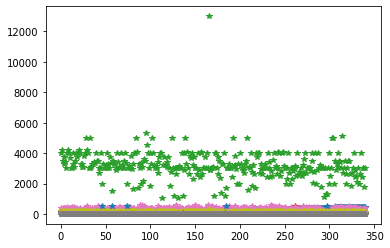

In [31]:
plt.plot(train,'*')
plt.show()

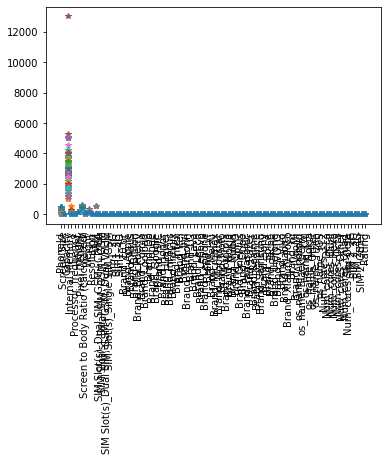

In [32]:
plt.plot(train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

## 

## Converting Categorical values into Numeric

In [33]:
 for f in train:
    train[f]=train[f].apply(lambda x: 1 if x>=train[f].mean() else 0)
    if f!="Rating":
        test[f]=test[f].apply(lambda x: 1 if x>=train[f].mean() else 0)

## Binarisation of Input

In [34]:
X_binarised_train = train_new.apply(pd.cut ,bins = 2, labels = [1,0])
X_binarised_test = test_new.apply(pd.cut ,bins = 2, labels = [1,0])

x_train = X_binarised_train.drop("Rating",axis = 1).values
y_train = X_binarised_train["Rating"].values



In [35]:
x_train = train.drop("Rating",axis = 1).values
y_train = train["Rating"].values

x_test = test.values
x_test = X_binarised_test.values

## MP Neuron

In [36]:
class MPNeuron:

  def __init__(self):
    self.b = None
  
  def model(self,x):
    return(sum(x)>=self.b)
  
  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    accuracy = {}

    for b in range(X.shape[1]+1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)

    best_b = max(accuracy, key=accuracy.get)
    self.b = best_b

    print('optimal value of b is',best_b)
    print('Highest accuracy is',accuracy[best_b])

In [37]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_train,y_train)

optimal value of b is 14
Highest accuracy is 0.6363636363636364


## Testing

In [38]:
y_pred = mp_neuron.predict(x_test)

## Submisssion

In [39]:
submission = pd.DataFrame({'PhoneId':phoneId, 'Class':y_pred})
submission.to_csv("submission.csv", index=False)